# Tasca M1 T01: Bases de dades relacionals (SQL)
## Luis Pardina - Data Science - 20/07/2022

### Exercici 1: A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

To create and fill the database I will use *phpMyAdmin*. This is a free software tool written in PHP, intended to handle the administration of MySQL over the Web in a user-friendly graphical environment. I execute the two pieces of SQL program delivered through the console of phpMyAdmin in order to generate the **movies database**.

I show below Entity-Relationship Diagram of the movies database. There are 5 tables:
    
    1. tb_movie, it contains 8 fields of information with 16 records (different movies):
            · movie_id: is an integer and the primary key of the table, it is pointed by the movie_id of tb_movie_person
            · movie_title: VARCHAR (variable character) that contains the title of the movie
            · movie_date: the date of production
            · movie_format: VARCHAR categorical with two values ('Film' or 'Digital')
            · movie_genre_id: the genre id, it is an index key to the genre_id of the table tb_genre.
            · created_by_user, created_date, updated_date: who made the record, when was it created and updated.
    
    2. tb_genre, it contains 5 fields with 11 records (info about different genres of the movies):
            · genre_id: is an integer and the primary key of the table, it is pointed by the movie_genre_id of tb_movie  
            · genre_name: VARCHAR categorical with 11 values (the 11 different genres of the movies)
            · created_by_user, created_date, updated_date: who made the record, when was it created and updated.
    
    3. tb_movie_person, it contains 7 fields with 42 records (info about movies and the people who participated in them):
            · movie_id: integer and a primary key of the table, it is an index key to the movie_id of the table tb_movie
            · person_id: integer and a primary key of the table, it is an index key to the person_id of the table tb_person
            · role_id: integer and a primary key of the table, it is an index key to the role_id of the table tb_role
            · movie_award_ind: a VARCHAR categorical field (Y/N) which tells if the movie won an award 
            · created_by_user, created_date, updated_date: who made the record, when was it created and updated.
    
    4. tb_person contains, it contains 9 fields with 50 records (info about artists who participate in movies):
            · person_id: is an integer and the primary key of the table, it is pointed by the person_id of tb_movie_person
            · person_name: VARCHAR (variable character) that contains the name of the artist
            · person_country: VARCHAR (variable character) that contains the country of origin of the artist
            · person_dob: DATE of birth of the artist
            · person_dod: DATE of death of the artist
            · person_parent_id: it is filled with NULLS, so it is unclear its use.
            · created_by_user, created_date, updated_date: who made the record, when was it created and updated.
            
    5. tb_role, it contains 5 fields with 5 records (info about the different roles making movies):
            · role_id: is an integer and the primary key of the table, it is pointed by the role_id of tb_movie_person  
            · role_name: VARCHAR categorical with 5 values (5 different roles of the movies)
            · created_by_user, created_date, updated_date: who made the record, when was it created and updated.
        

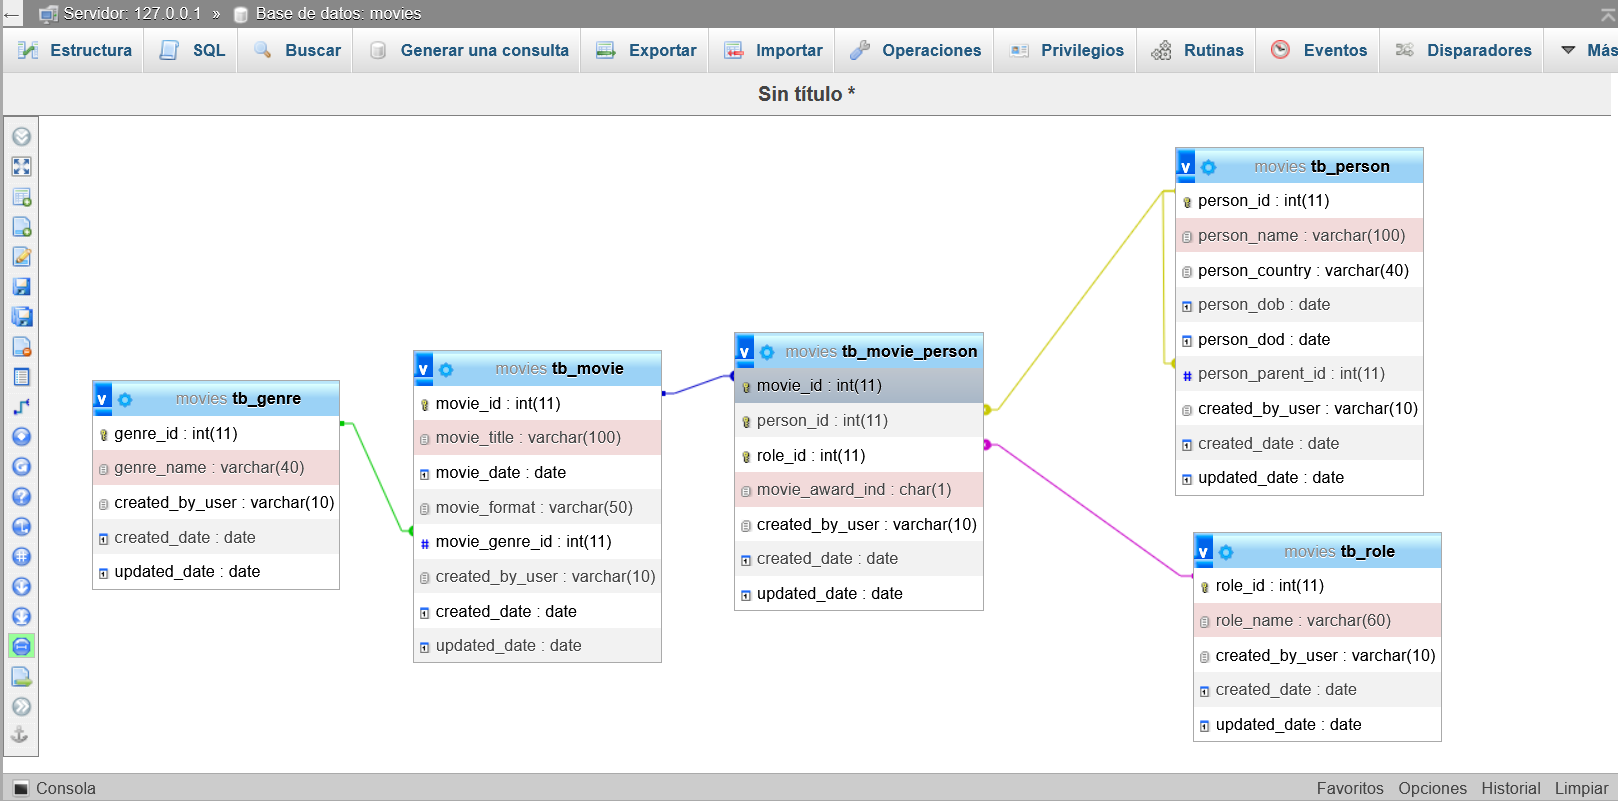

I need to use object-relational mapper (ORMs). These are code libraries that automate the transfer of data stored in relational database tables into objects that are more commonly used in python code. 

In [1]:
import pandas as pd
import mysql.connector                     # ORM to make changes in the database
import sqlalchemy                          # ORM that converts querys into DataFrames very easily

I access the server with mysql.connector and create a cursor that will allow me to make queries in mySQL:

In [32]:
connect = mysql.connector.connect(host="localhost", database='movies', user="root")

In [33]:
mycursor = connect.cursor()
mycursor.execute("SHOW TABLES")

for tb in mycursor:
    print(tb)

('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


I create now the sqalchemy connector, it makes very simple to convert tables into DataFrames:


In [6]:
engine = sqlalchemy.create_engine('mysql+mysqlconnector://root:@localhost/movies')

In [7]:
person_df = pd.read_sql_table("tb_person", engine)
person_df.head()

,person_id,person_name,person_country,person_dob,person_dod,person_parent_id,created_by_user,created_date,updated_date
0,1,Francis Ford Coppola,United States,1939-04-07,NaT,NaN,OS_SGAD,NaT,NaT
1,2,Carmine Coppola,United States,1945-07-08,NaT,NaN,OS_SGAD,NaT,NaT
2,3,Marlon Brando,United States,1924-04-03,2004-07-01,NaN,OS_SGAD,NaT,NaT
3,4,Robert Duvall,United States,1931-01-05,NaT,NaN,OS_SGAD,NaT,NaT
4,5,Martin Sheen,United States,1940-08-03,NaT,NaN,OS_SGAD,NaT,NaT


### Exercici 2: Realitza la següent consulta sobre la base de dades acabada de crear: 
    
    - Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.

The first exercise is simply to select in the person table the desired fields (name, country and date of birth) with the condition that the record (the person) has not date of death, that is, she/he is alive. Ordered by date of birth:

In [10]:
query = """
SELECT person_name as Name, person_country as Nationality, person_dob as Date_of_birth
FROM `tb_person` 
WHERE `person_dod` IS NULL 
ORDER BY person_dob ASC
"""

query1 = pd.read_sql_query(query, engine)
query1

,Name,Nationality,Date_of_birth
0,John Williams,United States,1928-08-08
1,Vera Miles,United States,1929-08-23
2,Sean Connery,Scotland,1930-07-08
3,Robert Duvall,United States,1931-01-05
4,Morgan Freeman,United States,1935-10-01
5,Francis Ford Coppola,United States,1939-04-07
6,Gary Kurtz,United States,1940-07-27
7,Martin Sheen,United States,1940-08-03
8,Harrison Ford,United States,1942-07-13
9,George Lucas,United States,1944-05-14


### Exercici 3: Realitza la següent consulta sobre la base de dades acabada de crear: 

    - Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  

This exercises requires to select the names of genres from the table tb_genre and join it with the count of genres in the table tb_movie, and present it in descending order:

In [12]:
query = '''
SELECT g.genre_name as Genre, COUNT(m.movie_genre_id) AS Count_of_movies
FROM tb_genre g 
LEFT JOIN tb_movie m
    ON g.genre_id = m.movie_genre_id
GROUP BY g.genre_name
ORDER BY Count_of_movies DESC
'''

query2 = pd.read_sql_query(query, engine)
query2

,Genre,Count_of_movies
0,Comedia,3
1,Romance,2
2,Acción,2
3,Drama,2
4,Suspense,2
5,Ciencia Ficción,2
6,Bélico,1
7,Terror,1
8,Fantasía,1
9,Musical,0


### Exercici 4: Realitza la següent consulta sobre la base de dades acabada de crear: 

    - Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

    - Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula

In this exercise we need first to COUNT and second to select the MAX of the counts. But it is not possible to layer aggregate functions on top of one another in the same SELECT clause. Then, inner aggregate would have to be performed in a subquery:

In [15]:
query = """
SELECT person_name as Name, MAX(roles) as Max_roles_in_a_movie
FROM
    (SELECT person_name, movie_id, COUNT(role_id) AS roles
    FROM tb_person
    LEFT JOIN tb_movie_person
        ON tb_person.person_id = tb_movie_person.person_id
    GROUP BY person_name, movie_id) as table1
GROUP BY person_name
"""

query3 = pd.read_sql_query(query, engine)
query3

,Name,Max_roles_in_a_movie
0,Alfred Joseph Hitchcock,3
1,Anthony Perkins,1
2,Bob Sheen,0
3,Carmen Machi,1
4,Carmine Coppola,1
5,Catherine Zeta-Jones,1
6,Charlie Sheen,1
7,Clara Lago,1
8,Dani Rovira,1
9,Daniel Sanchez Arevalo,2


The second part of the exercise is simply adding a HAVING sentence to select only > 1 roles in a movie:

In [16]:
query = """
SELECT person_name as Name, MAX(roles) as Max_roles_in_a_movie
FROM
    (SELECT person_name, movie_id, COUNT(role_id) AS roles
    FROM tb_person
    LEFT JOIN tb_movie_person
        ON tb_person.person_id = tb_movie_person.person_id
    GROUP BY person_name, movie_id) as table1
GROUP BY person_name
HAVING Max_roles_in_a_movie > 1
"""
query4 = pd.read_sql_query(query, engine)
query4

,Name,Max_roles_in_a_movie
0,Alfred Joseph Hitchcock,3
1,Daniel Sanchez Arevalo,2
2,Francis Ford Coppola,3
3,George Lucas,2
4,Mel Gibson,2
5,Steven Spielberg,2


### Exercici 5: Realitza la següent operació sobre la base de dades acabada de crear: 

    - Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

The easiest way I've found to add a record is to use the cursor:

In [17]:
add_record = """
INSERT INTO movies.tb_genre (genre_id, genre_name, created_by_user, created_date, updated_date)
VALUES (%s, %s, %s, %s, %s)
"""

mycursor.execute(add_record, ('69', 'Documental', 'OS_SGAD', '2022-07-19', '2022-07-19'))
connect.commit()

Let's check that effectively I have added the record at the end of the table:

In [18]:
new_genre_df = pd.read_sql_table("tb_genre", engine)
new_genre_df

,genre_id,genre_name,created_by_user,created_date,updated_date
0,1,Acción,OS_SGAD,NaT,NaT
1,2,Ciencia Ficción,OS_SGAD,NaT,NaT
2,3,Comedia,OS_SGAD,NaT,NaT
3,4,Drama,OS_SGAD,NaT,NaT
4,5,Fantasía,apermag,NaT,NaT
5,6,Melodrama,apermag,2018-09-01,2018-09-27
6,7,Musical,OS_SGAD,NaT,NaT
7,8,Romance,OS_SGAD,NaT,NaT
8,9,Suspense,OS_SGAD,NaT,NaT
9,10,Terror,OS_SGAD,NaT,NaT


### Exercici 6: Fes la següent operació sobre la base de dades acabada de crear:  

    - Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

First let's check the id of that movie:

In [19]:
query = """
SELECT m.movie_id, m.movie_title FROM tb_movie m WHERE m.movie_title = 'La Gran Familia Española'
"""
query5 = pd.read_sql_query(query, engine)
query5

,movie_id,movie_title
0,11,La Gran Familia Española


To delete the movie with id = 11 from the tb_movie table it is necessary to previously delete all the records of that movie also in the tb_movie_person! This is because these records point to the movie from the tb_movie table since the movie_id fields are linked and the two tables are related.

In [21]:
delete_record = '''
DELETE 
FROM movies.tb_movie_person
WHERE movie_id = 11;
'''
mycursor.execute(delete_record)
connect.commit()

delete_record = '''
DELETE 
FROM movies.tb_movie
WHERE movie_id = 11;
'''
mycursor.execute(delete_record)
connect.commit()


In [23]:
new_movie_df = pd.read_sql_table("tb_movie", engine)
new_movie_df

,movie_id,movie_title,movie_date,movie_format,movie_genre_id,created_by_user,created_date,updated_date
0,1,Apocalypse Now,1979-05-10,Film,11,OS_SGAD,NaT,NaT
1,2,Star Wars:Episode IV - A New Hope,1977-05-25,Film,2,OS_SGAD,NaT,NaT
2,3,Indiana Jones and the Temple of Doom,1984-05-08,Film,1,OS_SGAD,NaT,NaT
3,4,The Terminal,2004-06-18,Digital,3,OS_SGAD,NaT,NaT
4,5,Jaws,1975-01-01,Film,10,OS_SGAD,NaT,NaT
5,6,ET The Extraterrestrial,1982-07-25,Film,5,OS_SGAD,NaT,NaT
6,7,Psycho,1960-05-06,Film,9,OS_SGAD,NaT,NaT
7,8,Ocho Apellidos Vascos,2014-03-14,Digital,3,OS_SGAD,NaT,NaT
8,9,Ocho Apellidos Catalanes,2016-06-09,Digital,8,OS_SGAD,NaT,NaT
9,10,El otro lado de la cama,2002-09-04,Digital,8,OS_SGAD,NaT,NaT


### Exercici 7: Realitza la següent operació sobre la base de dades acabada de crear: 

    - Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

Let's check first the id for the genre "Comedia":

In [25]:
query = """
SELECT g.genre_id, g.genre_name FROM tb_genre g WHERE g.genre_name = 'Comedia'
"""
query6 = pd.read_sql_query(query, engine)
query6

,genre_id,genre_name
0,3,Comedia


And now let's check the id for the movie "Ocho apellidos catalanes":

In [26]:
query = """
SELECT m.movie_id, m.movie_title FROM tb_movie m WHERE m.movie_title = 'Ocho apellidos catalanes'
"""
query7 = pd.read_sql_query(query, engine)
query7

,movie_id,movie_title
0,9,Ocho Apellidos Catalanes


In [ ]:
Finally, simply change the id of the genre to 3 in the movie id = 9 of the movie table:

In [29]:
change_field='''
UPDATE  movies.tb_movie 
SET movie_genre_id= 3
WHERE movie_id= 9
'''
mycursor.execute(change_field)
connect.commit()

Let's check the result of the change in the record:

In [31]:
query = """
SELECT m.movie_id, m.movie_title as Title, m.movie_genre_id, g.genre_name as Genre
FROM tb_movie m 
LEFT JOIN tb_genre g
        ON m.movie_genre_id = g.genre_id
WHERE m.movie_title = 'Ocho apellidos catalanes'
"""
query8 = pd.read_sql_query(query, engine)
query8

,movie_id,Title,movie_genre_id,Genre
0,9,Ocho Apellidos Catalanes,3,Comedia
